In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import root
#from scipy.optimize import minimize
import uncertainties

In [87]:
#determining the resistivity
def transcendent_function(f, x):
    return np.cosh(np.log(2)/f * (x-1)/(x+1)) - 0.5*np.exp(np.log(2)/f)

#temperature with uncertainty
def temp_uncert(T):
    new_T=[]
    for t in range(len(T)):
        if T[t]>70:
            new_T.append(uncertainties.ufloat(T[t], abs(T[t])*0.002))
        else:
            new_T.append(uncertainties.ufloat(T[t], abs(T[t])*0.01))
    return np.array(new_T)


df=pd.read_csv("data_e092.csv")
print(df)

d = uncertainties.ufloat(500e-6, 1e-6)
#temperature conversion in K
T_1 = 509/8 - 89/2/df["R_temp1_ohm"] + 43/30*np.sqrt(df["R_temp1_ohm"]) + 161/113*df["R_temp1_ohm"]**1.1
T_2 = 509/8 - 89/2/df["R_temp2_ohm"] + 43/30*np.sqrt(df["R_temp2_ohm"]) + 161/113*df["R_temp2_ohm"]**1.1
#adding uncertainties to temperature
T_1=temp_uncert(T_1)
T_2=temp_uncert(T_2)


rho1=[]
#calculating resistance
for i in range(len(df["R_temp1_ohm"])):
    #Current of 500uA = 0.5mA
    R_abcd = (abs(df["1a_mV"][i]/0.5) + abs(df["1b_mV"][i]/(-0.5)))/2 #both current directions
    R_bcda = (abs(df["2a_mV"][i]/0.5) + abs(df["2b_mV"][i]/(-0.5)))/2 #both current directions
    x=R_abcd/R_bcda 
    f = root(transcendent_function, 0.5, args=(x, )).x[0] #finding solution for the transcendent equation

    rho1.append(np.pi * d / np.log(2) *0.5*(R_abcd+R_bcda)*f) #calculating rho in SI units
    rho = np.array(rho1)

#calculating Hall's coefficient
#here discuss if we need negative sing because of the currrent direction
R_acbd_a = df["3a_B_mV"]/0.5
R_acbd_b = df["3b_B_mV"]/(-0.5)
R_H_1 = d/0.2525 * (R_acbd_a - df["3a_0_mV"])
R_H_2 = d/0.2525 * (R_acbd_b - (-df["3b_0_mV"]))
R_H = (R_H_1+R_H_2)/2

    R_temp1_ohm   1a_mV   1b_mV   2a_mV   2b_mV  R_temp2_ohm  3a_0_mV  \
0       108.443  25.673 -25.687  11.630 -11.640      108.442   14.000   
1       108.442  25.672 -25.688  11.626 -11.637      108.442   14.000   
2       108.442  25.672 -25.688  11.626 -11.638      108.442   14.000   
3       108.442  25.673 -25.688  11.627 -11.638      108.442   14.000   
4       108.442  25.673 -25.687  11.627 -11.638      108.442   14.000   
..          ...     ...     ...     ...     ...          ...      ...   
61        7.433  22.177 -22.361  10.438 -10.128        6.808   12.630   
62        5.249  26.804 -26.991  12.664 -12.772        4.782   15.551   
63        3.545  32.099 -33.514  15.754 -15.912        3.201   19.134   
64        2.478  40.416 -40.524  18.789 -18.852        2.404   22.389   
65        1.850  50.697 -61.891  29.139 -29.429        1.330   36.089   

    3a_B_mV  3b_B_mV  3b_0_mV  
0     3.953   -3.972  -14.017  
1     3.955   -3.968  -14.017  
2     3.955   -3.996  -14.0

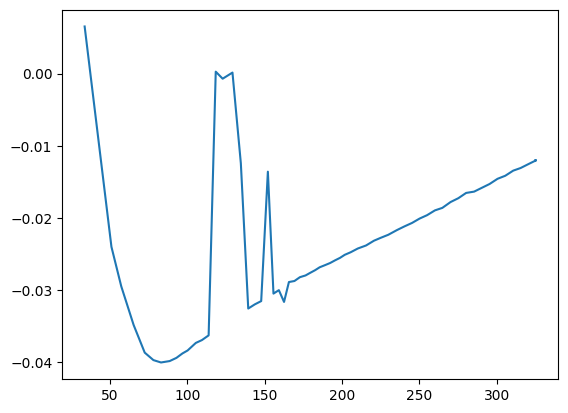

In [88]:
plt.plot(np.array([T_2[i].n for i in range(len(T_2))]), np.array([R_H[i].n for i in range(len(R_H))]))

In [76]:
R_H

0     -0.012047+/-0.000024
1     -0.012050+/-0.000024
2     -0.011995+/-0.000024
3     -0.012048+/-0.000024
4     -0.012050+/-0.000024
              ...         
61      -0.03866+/-0.00008
62      -0.03483+/-0.00007
63      -0.02947+/-0.00006
64      -0.02400+/-0.00005
65     0.006526+/-0.000013
Length: 66, dtype: object

In [33]:
print(rho*1e6) #for unit of /ohm /mm^2 per /m^2

[ 80241.01354829  80230.39610964  80231.912963    80234.30488027
  80233.42979088  79243.1233972  546747.62804851  76494.22280314
  75143.85146383  73780.04729588  72446.18028371  71169.24016722
  69791.02152553  68452.00162102  67170.97614269  65795.44853227
  64463.57407992  63138.01611254  61871.80522211  59102.97278233
  59379.69441563  58109.49440759  58141.03615482  55716.6551518
  54336.34223441  53326.9146028   51914.04772586  50806.44800009
  49722.83739506  48868.14221404  48241.80397751  47574.27006138
  46877.33623577  46177.67473129  45525.88121206  44971.0125345
  44377.47549483  43872.23438726  43270.80839756  42717.91962611
  42171.33844041  41709.56905866  41294.38456087  40901.70041865
  40522.32741122  40149.10559606  39878.26553397  39681.79391292
  39448.95903536  39632.39307907  39255.76517033  30442.70194947
  21229.38222274  42039.10637366  43367.62091066  45352.90517156
  46878.84618248  49002.38842069  60578.62518922  57508.04364618
  62534.40527815  70167.442